In [4]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [9]:
unclean_drought_df = pd.read_csv('NOAA_csvs/drought_2010_2019.csv')
unclean_drought_df.head()

,Unnamed: 0,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,0,497009,SOUTHERN SACRAMENTO VALLEY (ZONE),,01/01/2014,0,Drought,,,0,...,,,,,,,,A plethora of records were set across interior...,January was an abnormally dry and warm month f...,1
1,1,498466,SE KERN CTY DESERT (ZONE),,01/01/2014,0,Drought,,,0,...,,,,,,,,NaN,The California drought continued in full force...,2
2,2,498465,INDIAN WELLS VLY (ZONE),,01/01/2014,0,Drought,,,0,...,,,,,,,,NaN,The California drought continued in full force...,3
3,3,498464,TULARE CTY MTNS (ZONE),,01/01/2014,0,Drought,,,0,...,,,,,,,,NaN,The California drought continued in full force...,4
4,4,498463,S SIERRA MTNS (ZONE),,01/01/2014,0,Drought,,,0,...,,,,,,,,NaN,The California drought continued in full force...,5


In [10]:
unclean_drought_df.columns

Index(['Unnamed: 0', 'EVENT_ID', 'CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_DATE',
       'BEGIN_TIME', 'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT',
       'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM',
       'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE',
       'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION',
       'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE',
       'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER'],
      dtype='object')

In [14]:
reduced_drought_df = unclean_drought_df[['EVENT_ID', 'CZ_NAME_STR', 'BEGIN_DATE', 'EVENT_TYPE', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 
                                       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM', 'CZ_FIPS',
                                       'EVENT_NARRATIVE', 'EPISODE_NARRATIVE']]
reduced_drought_df

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,EVENT_TYPE,DEATHS_DIRECT,DEATHS_INDIRECT,INJURIES_DIRECT,INJURIES_INDIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,EVENT_NARRATIVE,EPISODE_NARRATIVE
0,497009,SOUTHERN SACRAMENTO VALLEY (ZONE),01/01/2014,Drought,0,0,0,0,0,0,17,A plethora of records were set across interior...,January was an abnormally dry and warm month f...
1,498466,SE KERN CTY DESERT (ZONE),01/01/2014,Drought,0,0,0,0,0,0,99,NaN,The California drought continued in full force...
2,498465,INDIAN WELLS VLY (ZONE),01/01/2014,Drought,0,0,0,0,0,0,98,NaN,The California drought continued in full force...
3,498464,TULARE CTY MTNS (ZONE),01/01/2014,Drought,0,0,0,0,0,0,97,NaN,The California drought continued in full force...
4,498463,S SIERRA MTNS (ZONE),01/01/2014,Drought,0,0,0,0,0,0,96,NaN,The California drought continued in full force...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,699890,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),02/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
535,699859,NORTHERN SAN JOAQUIN VALLEY (ZONE),03/01/2017,Drought,0,0,0,0,0,0,19,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
536,699889,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),03/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
537,699893,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),04/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to ease th...


In [18]:
clean_drought_df = reduced_drought_df.rename(columns={'EVENT_ID': 'NOAA ID', 
                                              'CZ_NAME_STR': 'County Name', 
                                              'BEGIN_DATE': 'Date', 
                                              'EVENT_TYPE': 'Type', 
                                              'DEATHS_DIRECT': 'Direct Deaths', 
                                              'DEATHS_INDIRECT': 'Indirect Deaths', 
                                              'INJURIES_DIRECT': 'Direct Injuries', 
                                              'INJURIES_INDIRECT': 'Indirect Injuries', 
                                              'DAMAGE_PROPERTY_NUM': 'Property Damage', 
                                              'DAMAGE_CROPS_NUM': 'Crop Damage', 
                                              'CZ_FIPS': 'NOAA FIPS',
                                              'EVENT_NARRATIVE': 'Event Narrative', 
                                              'EPISODE_NARRATIVE': 'Episode Narrative' })
clean_drought_df

,NOAA ID,County Name,Date,Type,Direct Deaths,Indirect Deaths,Direct Injuries,Indirect Injuries,Property Damage,Crop Damage,NOAA FIPS,Event Narrative,Episode Narrative
0,497009,SOUTHERN SACRAMENTO VALLEY (ZONE),01/01/2014,Drought,0,0,0,0,0,0,17,A plethora of records were set across interior...,January was an abnormally dry and warm month f...
1,498466,SE KERN CTY DESERT (ZONE),01/01/2014,Drought,0,0,0,0,0,0,99,NaN,The California drought continued in full force...
2,498465,INDIAN WELLS VLY (ZONE),01/01/2014,Drought,0,0,0,0,0,0,98,NaN,The California drought continued in full force...
3,498464,TULARE CTY MTNS (ZONE),01/01/2014,Drought,0,0,0,0,0,0,97,NaN,The California drought continued in full force...
4,498463,S SIERRA MTNS (ZONE),01/01/2014,Drought,0,0,0,0,0,0,96,NaN,The California drought continued in full force...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,699890,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),02/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
535,699859,NORTHERN SAN JOAQUIN VALLEY (ZONE),03/01/2017,Drought,0,0,0,0,0,0,19,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
536,699889,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),03/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to decreas...
537,699893,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),04/01/2017,Drought,0,0,0,0,0,0,67,The Household Water Supply Shortage Reporting ...,Long term drought impacts continued to ease th...


In [24]:
clean_drought_df['County Name'].value_counts()

KERN CTY MTNS (ZONE)                                                35
SE KERN CTY DESERT (ZONE)                                           35
SW S.J. VALLEY (ZONE)                                               34
E CENTRAL S.J. VALLEY (ZONE)                                        34
S SIERRA FOOTHILLS (ZONE)                                           34
W CENTRAL S.J. VALLEY (ZONE)                                        34
SE S.J. VALLEY (ZONE)                                               34
S SIERRA MTNS (ZONE)                                                34
TULARE CTY MTNS (ZONE)                                              34
INDIAN WELLS VLY (ZONE)                                             34
TULARE CTY FOOTHILLS (ZONE)                                         34
NORTHERN SAN JOAQUIN VALLEY (ZONE)                                  25
SOUTHERN SACRAMENTO VALLEY (ZONE)                                   18
NORTHERN SACRAMENTO VALLEY (ZONE)                                   17
MOTHER

In [28]:
clean_drought_df["Direct Deaths"].value_counts()

0    539
Name: Direct Deaths, dtype: int64

In [29]:
clean_drought_df["Indirect Deaths"].value_counts()

0    539
Name: Indirect Deaths, dtype: int64

In [30]:
clean_drought_df["Direct Injuries"].value_counts()

0    539
Name: Direct Injuries, dtype: int64

In [31]:
clean_drought_df["Indirect Injuries"].value_counts()

0    539
Name: Indirect Injuries, dtype: int64

In [32]:
clean_drought_df["Property Damage"].value_counts()

0    539
Name: Property Damage, dtype: int64

In [33]:
clean_drought_df["Crop Damage"].value_counts()

0             538
1500000000      1
Name: Crop Damage, dtype: int64

In [34]:
clean_drought_df["NOAA FIPS"].value_counts()

99    38
95    38
92    37
98    37
89    37
90    37
91    37
93    37
94    37
96    37
97    37
19    25
17    18
15    17
67    17
18    14
16    11
69    10
64     9
63     6
13     2
68     1
Name: NOAA FIPS, dtype: int64

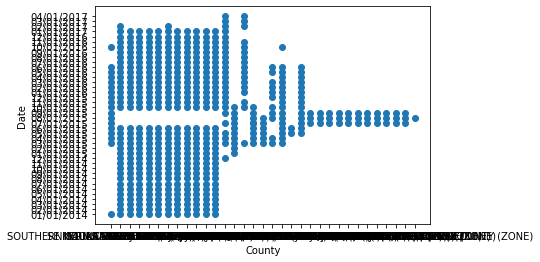

In [39]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,2])
plt.xlabel('County')
plt.ylabel('Date')
plt.show()

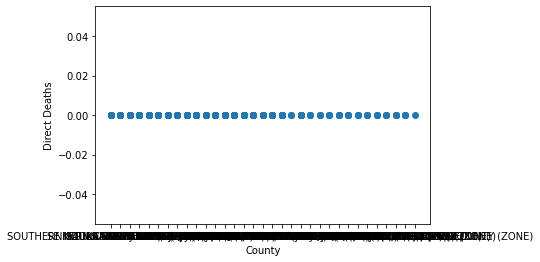

In [40]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,4])
plt.xlabel('County')
plt.ylabel('Direct Deaths')
plt.show()

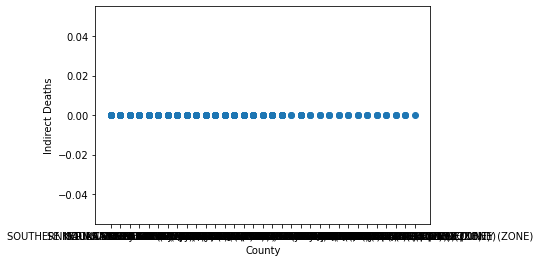

In [41]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,5])
plt.xlabel('County')
plt.ylabel('Indirect Deaths')
plt.show()

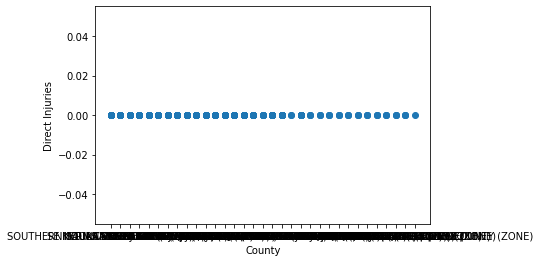

In [42]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,6])
plt.xlabel('County')
plt.ylabel('Direct Injuries')
plt.show()

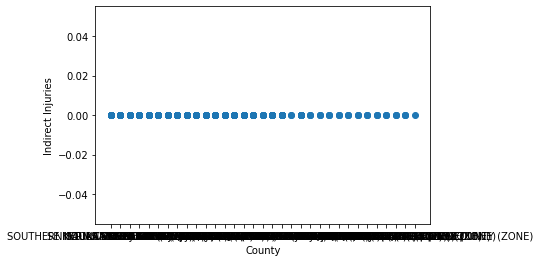

In [43]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,7])
plt.xlabel('County')
plt.ylabel('Indirect Injuries')
plt.show()

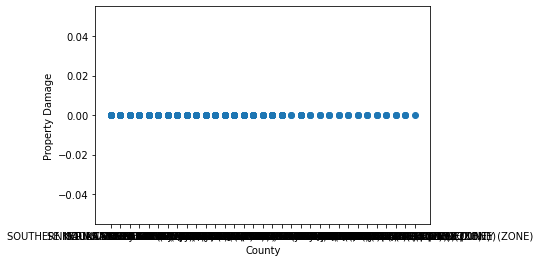

In [44]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,8])
plt.xlabel('County')
plt.ylabel('Property Damage')
plt.show()

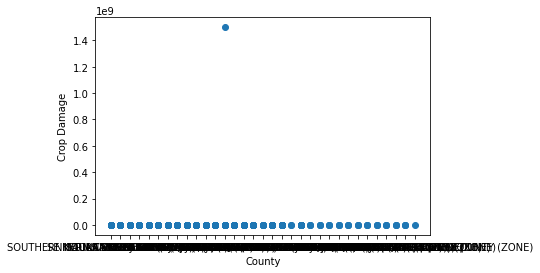

In [45]:
plt.scatter(clean_drought_df.iloc[:,1],clean_drought_df.iloc[:,9])
plt.xlabel('County')
plt.ylabel('Crop Damage')
plt.show()